# CCT - ML CA2 - eBay Shill Bidding Dataset
<b>by Victor Ferreira Silva</b><p>Student #2021324<br/>January 2023</p>
* [Introduction](#Introduction)
* [Data Preparation](#DataPreparation)
    * [Data Characterisation](#DataCharact)    
    * [Exploratory Data Analysis](#ExploratoryDataAnalysis)
    * [Data Cleaning](#DataCleaning)
    * [Feature Engineering](#FeatureEngineering)
    * [Handling Imbalanced Data](#DataBalancing)
    * [Data Scaling](#DataScaling)
* [Dimensionality Reduction](#Dimensionality)
    * [Principal Component Analysis (PCA)](#Pca)
* [Machine Learning](#MachineLearning)
    * [LinearSVC](#LinearSVC)
    * [Neural Networks](#Ann)
    * [k-Nearest Neighbours](#Knn)
* [Conclusion](#Conclusion)
* [References](#References)

[SBD Dataset Web Page](https://archive.ics.uci.edu/ml/datasets/Shill+Bidding+Dataset)

## <a id="Introduction"></a>Introduction ##
The ability to predict normal and abnormal bidding behaviour of eBay users can help companies identify scams and other undesirable users on the platform. The Shill Bidding Dataset (SBD) consists of eBay auctions that have various features, including auction duration, bidder tendency and class.

The goal of this project is to apply supervised and unsupervised machine learning techniques to the data set after properly preparing and characterising it. To improve the results, scaling and feature reduction methods were used, and the performance and accuracy of the applied machine learning methods were compared. At the end of the report, the methods that performed optimally on this dataset were identified.

## Data Preparation<a id="DataPreparation"></a>

In [419]:
# Imports and configurations
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### Data Characterisation<a id="DataCharact"></a> 
Data characterisation involves summarising the various features and characteristics present in a dataset through preprocessing. This process typically involves using statistical measures to introduce the data to the viewer, as well as visualising it using graphs such as bar charts and scatter plots.

In [44]:
# loading the original dataset
df = pd.read_csv('Shill Bidding Dataset.csv')

df.head(5)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [46]:
# absence of missing values
df.isnull().sum().sum()

0

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Record_ID,6321.0,7535.829457,4364.759137,1.000000,3778.000000,7591.000000,11277.000000,15144.000000
Auction_ID,6321.0,1241.388230,735.770789,5.000000,589.000000,1246.000000,1867.000000,2538.000000
Bidder_Tendency,6321.0,0.142541,0.197084,0.000000,0.027027,0.062500,0.166667,1.000000
Bidding_Ratio,6321.0,0.127670,0.131530,0.011765,0.043478,0.083333,0.166667,1.000000
Successive_Outbidding,6321.0,0.103781,0.279698,0.000000,0.000000,0.000000,0.000000,1.000000
Last_Bidding,6321.0,0.463119,0.380097,0.000000,0.047928,0.440937,0.860363,0.999900
Auction_Bids,6321.0,0.231606,0.255252,0.000000,0.000000,0.142857,0.454545,0.788235
Starting_Price_Average,6321.0,0.472821,0.489912,0.000000,0.000000,0.000000,0.993593,0.999935
Early_Bidding,6321.0,0.430683,0.380785,0.000000,0.026620,0.360104,0.826761,0.999900
Winning_Ratio,6321.0,0.367731,0.436573,0.000000,0.000000,0.000000,0.851852,1.000000


Upon initial examination, the SBD dataset contains 6321 observations with 13 features. The first three columns represent the record ID, auction, and bidder. According to the Pandas `info()` method, all columns except the bidder ID are numeric. The `.isnull().sum()` method returns a series with the number of missing values in each column of the dataframe. Both methods indicates the complete absence of missing values.

Also, the `describe()` method provides some general descriptive statistics for the data. Apparently, the data has undergone some pre-processing, as the range of auction duration is from 0 to 10 and the range of all other numerical features is from 0 to 1. Finally, duplicated values were not found, as it can be seen on the following line.

In [48]:
df.duplicated().any()

False

### Exploratory Data Analysis<a id="ExploratoryDataAnalysis"></a> 
According to the pie chart below, only 10.7% (674 observations) of the biddings on SBD are deemed abnormal. The imbalanced nature of the data in this case should be taken into consideration when analysing or modelling the data. A heavily imbalanced dataset such as this can potentially influence the results of the analysis, as the majority of the observations belong to the "normal" class. To mitigate this issue, it may be necessary to adjust the balance of the data through oversampling of the minority class or undersampling of the majority class in order to obtain a more balanced dataset. This can help prevent bias towards the majority class in the model or analysis.

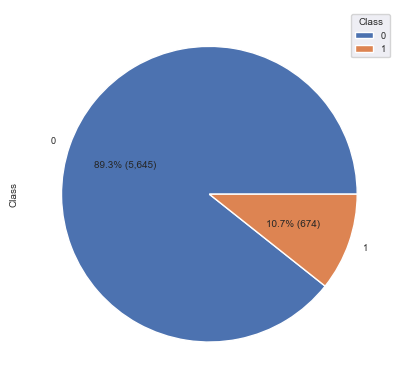

In [49]:
def custom_autopct(pct):
    return f"{pct:.1f}% ({int(pct * sum(df['Class'].value_counts()) / 100):,})"

df['Class'].value_counts().plot(kind='pie', autopct=custom_autopct)

plt.legend(title='Class')
plt.show()

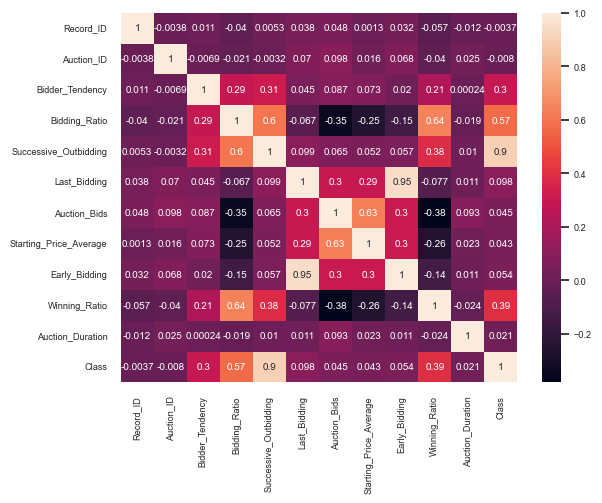

In [50]:
# Computing the correlations
corr = df.corr()
sns.set(font_scale=0.6)
sns.heatmap(corr, annot=True)
plt.show()

The heatmap above shows the correlation matrix for all numerical features in a single graph. A very strong positive correlation between early and last bidding features is notorious. Another noticeable relationships are the strong correlation between the winning ratio and bidding ratio and the very strong positive one between sucessive outbidding and class.

The following boxplot illustrates the distribution of bids among the 1054 distinct bidders identified using the `Bidder_ID` feature, which serves as a unique identifier for each bidder. As depicted, three quarters of bidders made 7 bids or fewer, with some outliers making up to 112 bids. It is worth noting that the most frequently occurring number of bids per bidder was 1.

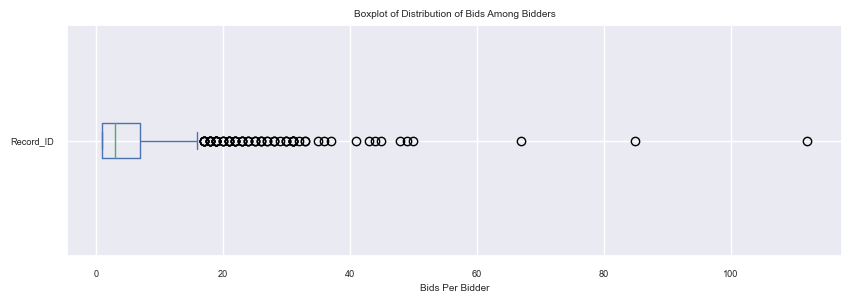

In [51]:
bids_per_bidder = df.pivot_table(index='Bidder_ID', values='Record_ID', aggfunc='count')
# bids_per_bidder.info()
# bids_per_bidder.mode()
bids_per_bidder.plot(kind='box', figsize=(10, 3), vert=False)
plt.title('Boxplot of Distribution of Bids Among Bidders')
plt.xlabel('Bids Per Bidder')
plt.show()

Similarly, the following histogram shows the distribution of bids among the 807 distinct auctions identified using the `Auction_ID` feature, which serves as a unique identifier for each auction. As shown, half of the auctions received 7 bids or fewer, with a few outliers receiving 26 bids. It is worth mentioning that the most frequently occurring value, or the mode, was 5. 

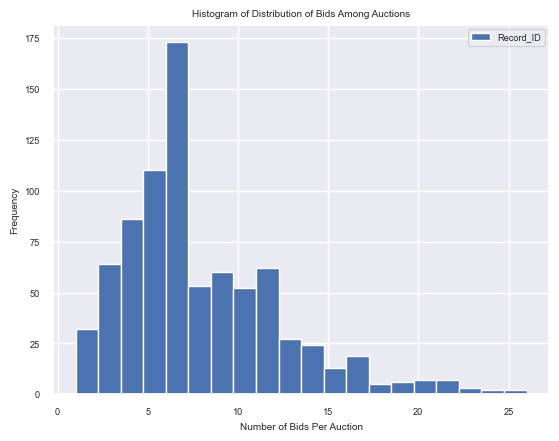

In [52]:
bids_per_auction = df.pivot_table(index='Auction_ID', values='Record_ID', aggfunc='count')
# bids_per_auction.mode()

bids_per_auction.plot(kind='hist', bins=20)
plt.title('Histogram of Distribution of Bids Among Auctions')
plt.xlabel('Number of Bids Per Auction')
plt.ylabel('Frequency')
plt.show()

The following boxplot illustrates the distribution of several numerical features with values ranging from 0 to 1. These 8 features are depicted in grouped boxplots as it is an effective way to visualise multiple distributions in a single graph, particularly when the y-axis range is consistent across all features. This plot provides valuable information, including the distribution of observations, quartile range including the median, and minimum and maximum values, which represent the range.

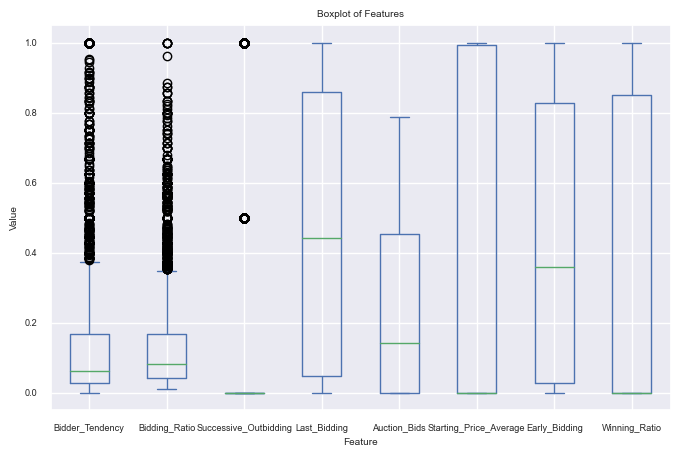

In [53]:
columns = ['Bidder_Tendency','Bidding_Ratio','Successive_Outbidding','Last_Bidding','Auction_Bids',
 'Starting_Price_Average','Early_Bidding','Winning_Ratio']

df[columns].plot(kind='box', figsize=(8, 5))
plt.title('Boxplot of Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

Finally, we have a simple histogram for Auction Duration, which was analysed separately as it has a distinct range from other features, that is, from 1 to 10. The histogram only reveals the presence of 5 distinct values which may indicate the availability of some predetermined auction duration options offered by the platform to sellers.

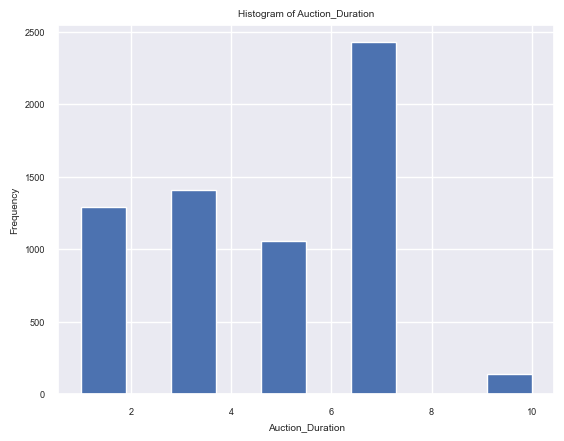

In [54]:
column = 'Auction_Duration'
df[column].plot(kind='hist', bins=10)
plt.title('Histogram of {}'.format(column))
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

### Data Cleaning<a id="DataCleaning"></a> 
As the series do not present any missing or duplicated data, it was decided to continue the interactions with the original dataset.

### Feature Engineering<a id="FeatureEngineering"></a> 
Feature engineering is an essential part of preparing data for machine learning modeling. It involves using various techniques, such as mathematical transformations, to modify the feature space in order to improve model performance. A Machine Learning expert is responsible for determining which features are relevant and should be included in the analysis.

One common first step in Feature Engineering is to remove unnecessary columns. In this case, the first three columns contain IDs that do not contribute to the analysis and can be removed. This process often involves trial and error, and requires careful judgement to ensure that the most useful features are retained.

In [55]:
df_feat = df.drop(columns=['Record_ID', 'Auction_ID', 'Bidder_ID'])
df_feat.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


### Handling Imbalanced Data<a id="DataBalancing"></a> 
After splitting a dataset into training and testing sets, with the training set comprising 80% of the data and the testing set comprising the remaining 20%, we can see that the training set is imbalanced, with 89% of the labels being "Normal" and only 11% being "Abnormal". 

In [215]:
# Split data into train and test sets
X = df_feat.drop('Class', axis=1)
y = df_feat['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train.value_counts(normalize=True)

0    0.892603
1    0.107397
Name: Class, dtype: float64

Balancing data is important in machine learning because it can help prevent the model from being biased towards the more prevalent class. Also, using a Dummy Classifier, which always predicts the most prevalent class, can be a useful baseline for comparison when evaluating the performance of a machine learning model on imbalanced data.

In [216]:
# Establishing a baseline with a DummyClassifier
dummyc = DummyClassifier()
dummyc.fit(X_train, y_train)

score = dummyc.score(X_train, y_train)
y_predicted = dummyc.predict(X_test)

print("Score: ", score)
print("Accuracy: ",metrics.accuracy_score(y_test, y_predicted))

Score:  0.8926028481012658
Accuracy:  0.8956521739130435


In [217]:
# balancing data by under sampling technique
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
y_train_rus.value_counts(normalize=True)

0    0.5
1    0.5
Name: Class, dtype: float64

### Data Scaling <a id="DataScaling"></a> 
Different orders of magnitude in the data can affect the results of machine learning algorithms. Standardisation and normalisation are commonly used scaling methods, but it is important to choose a method that preserves the impact of the outliers on the output of the machine learning algorithm. For this analysis, even though the auction duration variable does not disproportionately impact the model compared to the other features, a `StandardScaler` was adopted. 

In [146]:
scaler = StandardScaler()
X_train_rus_scaled = scaler.fit_transform(X_train_rus.astype(np.float32))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float32))

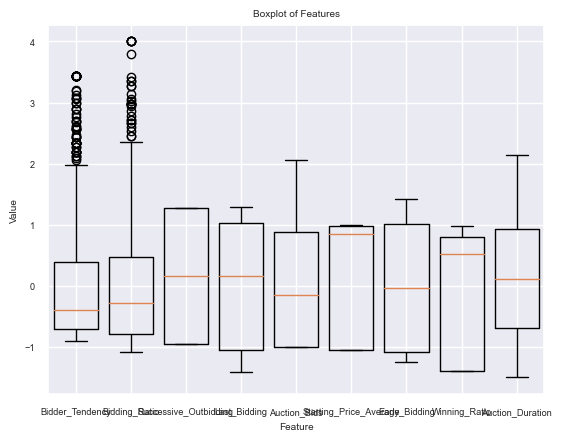

In [147]:
features = [X_train_rus_scaled[:, i] for i in range(9)]

plt.boxplot(features, widths=0.8)
plt.title('Boxplot of Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(range(1, 10), X_train_rus.columns)
plt.show()

## Dimensionality Reduction<a id="Dimensionality"></a>

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset. It is often used as a preprocessing step before applying machine learning algorithms, as it can help to reduce the computational complexity of the model, improve its interpretability, and reduce the risk of overfitting.


### Principal Component Analysis (PCA)<a id="Pca"></a>

One common technique for dimensionality reduction is principal component analysis (PCA) which is an unsupervised learning method. PCA is a linear transformation that identifies the directions in the data that capture the most variance. These directions are known as the "principal components" of the data. The principal components are ranked by the amount of variance they capture, with the first component capturing the most variance and the subsequent components capturing progressively less variance.

In this project, PCA applies to the dataset after setting the `n_components` hyperparameter to 2, indicating that the first two principal components should be retained. As a result, the percentage of variance captured by the first and second principal components is respectively 29.6% and 28.1%, which together capture a total of 57.7% of the variance in the data. The first and second principal components are then used to create a scatter plot of the reduced data, which is coloured by the `Class` column of the original dataset. This allows you to visualise the reduced data and see how the different classes are distributed in the two-dimensional space defined by the first and second principal components.

In [152]:
pca = PCA(n_components=2)
pca.fit(X_train_rus_scaled)
X_train_pca = pca.transform(X_train_rus_scaled)

print("Original shape: {}".format(str(X_train_rus.shape)))
print("Reduced shape: {}".format(str(X_train_pca.shape)))

Original shape: (1076, 9)
Reduced shape: (1076, 2)


In [153]:
# Variance captured by the components
variance_captured = pca.explained_variance_ratio_
print(variance_captured)

[0.29620263 0.28082356]


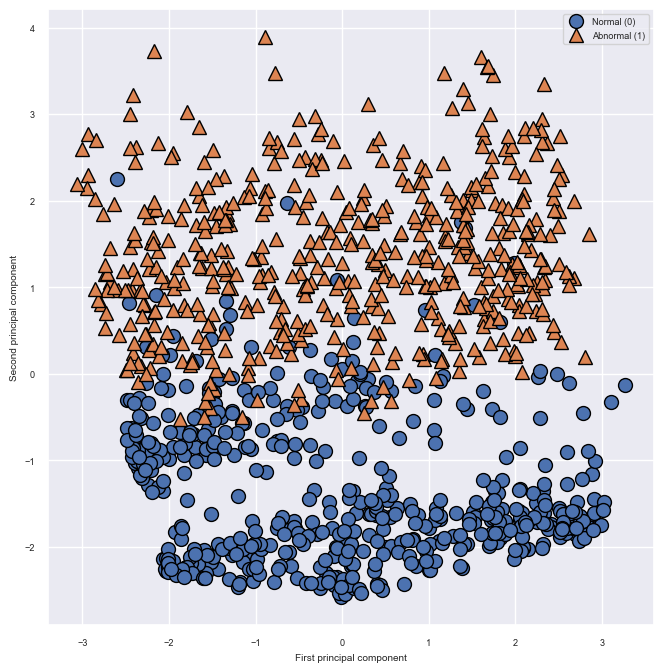

In [141]:
# plotting first vs. second principal component, colored by class
plt.figure(figsize = (8, 8))
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train_rus)
plt.legend(['Normal (0)','Abnormal (1)'], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

Text(0, 0.5, 'Principal components')

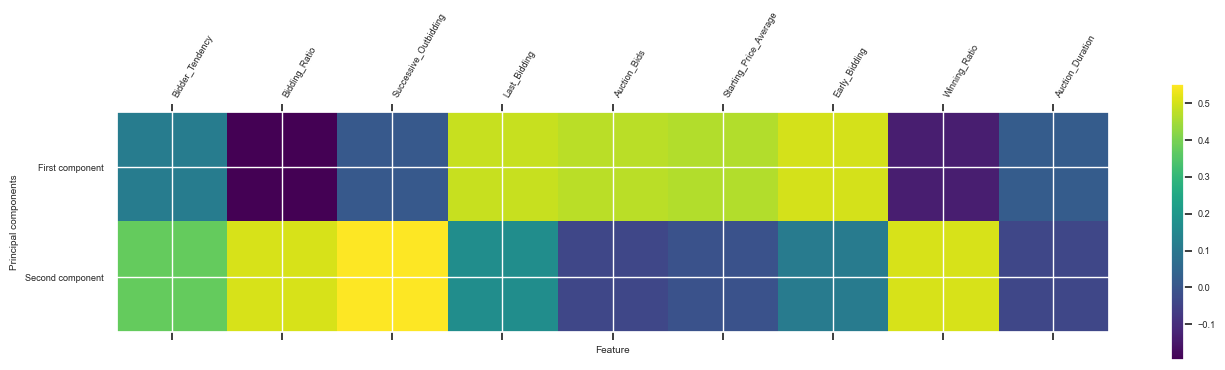

In [142]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(list(X_train_rus.columns))), list(X_train_rus.columns), rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

## Machine Learning<a id="MachineLearning"></a>

After adopting PCA to reduce the dimensionality of data, three supervised learning techniques were employed to classify labeled bids from SBD as either normal or abnormal: LinearSVC, Artificial Neural Networks, and k-Nearest Neighbours. The parametrisation for each algorithm was tuned through hyperparametrisation and the use of GridSearchCV.

LinearSVC is a type of support vector machine that is employed for classification tasks by identifying a hyperplane in order to maximise the distance between classified samples. As PCA indicated that the data appears to be linearly separable, LinearSVC has been selected as one of the options for classification.

The use of Neural Networks (ANN) in the classification of SBD is considered reasonable, despite the presence of linearity in the resulting data from PCA. This decision was made in order to compare the performance of models capable of modeling non-linear relationships, such as ANN, with models such as LinearSVC, which are known to be effective in dealing with data that is more linearly separable.

Finally, the use of k-Nearest Neighbours (kNN) for the classification of labeled records from the SBD was also considered in this study, as it has been demonstrated to be effective in solving classification problems. Additionally, the reduced dimensionality resulting from the use of PCA serves to improve the efficiency and effectiveness of the kNN model, as distance-based classification can be computationally expensive when dealing with a large number of dimensions.

Before proceeding, it is necessary to apply PCA to the test data as well, as can be seen below, as the training data was previously subjected to this dimensionality reduction technique. This ensures consistency in the data being used for evaluation.

In [393]:
# apply PCA to test data
pca_test = PCA(n_components=2)
pca_test.fit(X_test_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Original shape: {}".format(str(X_test_scaled.shape)))
print("Reduced shape: {}".format(str(X_test_pca.shape)))

Original shape: (270, 9)
Reduced shape: (270, 2)


Using a Dummy Classifier on normalised data serves as a baseline for comparison of the performance of the other models. By providing a reference point for evaluation, the effectiveness of the following models can be accurately assessed as they are also run on scaled data. This helps to ensure that any improvements in accuracy or performance of the other models are due to their specific algorithms rather than simply the effect of the data being normalised.

In [401]:
# DummyClassifier x Normalized data
dummyc = DummyClassifier()
dummyc.fit(X_train_pca, y_train_rus)

score = dummyc.score(X_train_pca, y_train_rus)
y_predicted = dummyc.predict(X_test_pca)

print("Score: ", score)
print("Accuracy: ",metrics.accuracy_score(y_test, y_predicted))

Score:  0.5
Accuracy:  0.4925925925925926


### Linear SVC<a id="LinearSVC"></a>
In the following code, a LinearSVC classifier is imported and instantiated. A grid search is performed using the GridSearchCV object, which is passed the LinearSVC classifier and a dictionary containing various parameters as inputs. The grid search is then fit to the training data and used to find the optimal combination of parameters for the classification model. The best score and best estimator are printed, and the optimal values for the specified parameters are extracted and used to instantiate a new LinearSVC classifier. This classifier is then fit to the training data and used to generate predictions on the test data. 

In [438]:
from sklearn.svm import LinearSVC

# Dict containing different parameters for LinearSVC 
param_grid = {
    'penalty': ['l1','l2'],
    'loss':['hinge', 'squared_hinge'],
    'dual': [False, True],
    'multi_class': ['ovr', 'crammer_singer']
}

# LinearSVC classifier
lin_clf = LinearSVC()

# GridSearchCV object is instantiated with these parameters and fit to training data
# using 10-fold cross validation and suppressing verbosity
grid_search_lsvc = GridSearchCV(estimator=lin_clf, param_grid=param_grid, cv=10, verbose=1)

# GridSearchCV object will be used to find the optimal combination of these parameters for the classification model
grid_search_lsvc.fit(X_train_pca, y_train_rus)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=LinearSVC(),
             param_grid={'dual': [False, True],
                         'loss': ['hinge', 'squared_hinge'],
                         'multi_class': ['ovr', 'crammer_singer'],
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [435]:
# best accuracy achieved in the grid search and the best estimator
print("best accuracy", grid_search.best_score_)
print(grid_search_lsvc.best_estimator_)

best accuracy 0.9164215723673502
LinearSVC(dual=False, loss='hinge', multi_class='crammer_singer', penalty='l1')


In [425]:
# retrieving optimal values for the parameters dual, loss, multi_class, and penalty from grid search
optimal_dual = grid_search_lsvc.best_params_['dual']
optimal_loss = grid_search_lsvc.best_params_['loss']
optimal_multi_class = grid_search_lsvc.best_params_['multi_class']
optimal_penalty = grid_search_lsvc.best_params_['penalty']

# instantiating a new LinearSVC classifier with optimal values
lin_clf = LinearSVC(dual=optimal_dual, loss=optimal_loss, multi_class=optimal_multi_class, penalty=optimal_penalty)
lin_clf.fit(X_train_pca, y_train_rus)

# calculating score and accuracy
score = lin_clf.score(X_train_pca, y_train_rus)
y_predicted_lin_clf = lin_clf.predict(X_test_pca)

print("Score: ", score)
print("Accuracy: ",metrics.accuracy_score(y_test, y_predicted_lin_clf))

Score:  0.9507434944237918
Accuracy:  0.9296296296296296


### Neural Networks<a id="Ann"></a>

The following script employs TensorFlow and Keras to implement an artificial neural network classifier. The `build_clf` function defines the classifier, taking as an input the number of units in the hidden layers. A grid search is then conducted to identify the optimal hyperparameters, comprising batch size, number of epochs, and the number of units in each hidden layer. The optimised model is subsequently trained using the determined hyperparameters, and its score and accuracy are printed.

In [429]:
# importing necessary modules, KerasClassifier wrapper, Sequential and Dense layers from Keras
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense


# defining function to create a Keras classifier
def build_clf(unit):
    # initialize Sequential model and adding layers to it
    ann_clf = tf.keras.models.Sequential()
    ann_clf.add(tf.keras.layers.Dense(units=unit, activation='relu'))
    ann_clf.add(tf.keras.layers.Dense(units=unit, activation='relu'))
    ann_clf.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    
    # compiling model with chosen optimizer, loss function, and evaluation metrics
    ann_clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    return ann_clf

# creating an instance of the KerasClassifier using the defined function as the build function
ann_model = KerasClassifier(build_fn=build_clf)

In [430]:
# defining parameter grid for grid search
param_grid = {
    'batch_size': [4, 9, 16, 25, 36, 49, 64],
    'nb_epoch': range(100, 800, 100),
    'unit': range(5, 45, 5)
}

# initializing a grid search object using the Keras classifier instance and defined parameter grid
# using 10-fold cross validation and suppressing verbosity
grid_search_ann = GridSearchCV(estimator=ann_model, param_grid=param_grid, cv=10, verbose=0)

# fitting grid search object to training data after using PCA
grid_search_ann.fit(X_train_pca, y_train_rus)

242/242 [==============================] - 1s 906us/step - loss: 0.2673 - accuracy: 0.9432


27/27 [==============================] - 0s 926us/step - loss: 0.2986 - accuracy: 0.8981


243/243 [==============================] - 1s 1ms/step - loss: 0.2782 - accuracy: 0.9257


27/27 [==============================] - 0s 964us/step - loss: 0.2276 - accuracy: 0.9352


243/243 [==============================] - 1s 967us/step - loss: 0.2461 - accuracy: 0.9112


27/27 [==============================] - 0s 908us/step - loss: 0.2822 - accuracy: 0.8889


243/243 [==============================] - 1s 974us/step - loss: 0.2585 - accuracy: 0.9247


27/27 [==============================] - 0s 943us/step - loss: 0.3064 - accuracy: 0.8981


243/243 [==============================] - 1s 909us/step - loss: 0.7087 - accuracy: 0.5717


27/27 [==============================] - 0s 949us/step - loss: 0.1629 - accuracy: 0.9259


242/242 [==============================] - 1s 949us/step - loss: 0.4117 - accuracy: 0.8450


27/27 [==============================] - 0s 929us/step - loss: 0.1747 - accuracy: 0.9167


12/12 [==============================] - 0s 2ms/step - loss: 0.2832 - accuracy: 0.9444


108/108 [==============================] - 0s 1ms/step - loss: 0.3873 - accuracy: 0.8566


108/108 [==============================] - 0s 1ms/step - loss: 0.3680 - accuracy: 0.9225


12/12 [==============================] - 0s 1ms/step - loss: 0.5011 - accuracy: 0.7315


12/12 [==============================] - 0s 1ms/step - loss: 0.2365 - accuracy: 0.9813


12/12 [==============================] - 0s 1ms/step - loss: 0.3873 - accuracy: 0.8889


108/108 [==============================] - 0s 1ms/step - loss: 0.3403 - accuracy: 0.9030


108/108 [==============================] - 0s 1ms/step - loss: 0.3984 - accuracy: 0.9236


12/12 [==============================] - 0s 1ms/step - loss: 0.3933 - accuracy: 0.7870


12/12 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.9346


12/12 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.8426


108/108 [==============================] - 1s 1ms/step - loss: 0.3349 - accuracy: 0.9205


61/61 [==============================] - 0s 1ms/step - loss: 0.5875 - accuracy: 0.8700


7/7 [==============================] - 0s 1ms/step - loss: 0.4547 - accuracy: 0.9167


61/61 [==============================] - 0s 1ms/step - loss: 0.6005 - accuracy: 0.7304


7/7 [==============================] - 0s 1ms/step - loss: 0.5159 - accuracy: 0.7290


61/61 [==============================] - 0s 1ms/step - loss: 0.4472 - accuracy: 0.9154


7/7 [==============================] - 0s 1ms/step - loss: 0.6793 - accuracy: 0.6667


61/61 [==============================] - 0s 1ms/step - loss: 0.4374 - accuracy: 0.8595


7/7 [==============================] - 0s 1ms/step - loss: 0.5842 - accuracy: 0.8224


61/61 [==============================] - 0s 1ms/step - loss: 0.4391 - accuracy: 0.8607


7/7 [==============================] - 0s 1ms/step - loss: 0.5624 - accuracy: 0.8333


61/61 [==============================] - 0s 1ms/step - loss: 0.5722 - accuracy: 0.6105


7/7 [==============================] - 0s 1ms/step - loss: 0.3153 - accuracy: 0.9533


39/39 [==============================] - 0s 1ms/step - loss: 0.5828 - accuracy: 0.7276


5/5 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.6204


39/39 [==============================] - 0s 1ms/step - loss: 0.5370 - accuracy: 0.8316


5/5 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.5607


39/39 [==============================] - 0s 1ms/step - loss: 0.4716 - accuracy: 0.8658


5/5 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.9259


39/39 [==============================] - 0s 1ms/step - loss: 0.8787 - accuracy: 0.2014


5/5 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.9907


39/39 [==============================] - 0s 1ms/step - loss: 0.4755 - accuracy: 0.9205


5/5 [==============================] - 0s 1ms/step - loss: 0.4448 - accuracy: 0.9167


39/39 [==============================] - 0s 1ms/step - loss: 0.6568 - accuracy: 0.5878


5/5 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.9439


27/27 [==============================] - 0s 1ms/step - loss: 0.6276 - accuracy: 0.6078


3/3 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.8796


27/27 [==============================] - 1s 2ms/step - loss: 0.5883 - accuracy: 0.8357


3/3 [==============================] - 0s 2ms/step - loss: 0.7545 - accuracy: 0.4299


27/27 [==============================] - 0s 1ms/step - loss: 0.6494 - accuracy: 0.5800


3/3 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.9537


27/27 [==============================] - 0s 1ms/step - loss: 0.8932 - accuracy: 0.5568


3/3 [==============================] - 0s 3ms/step - loss: 0.4687 - accuracy: 0.9439


27/27 [==============================] - 0s 1ms/step - loss: 0.5584 - accuracy: 0.8204


3/3 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8981


27/27 [==============================] - 0s 1ms/step - loss: 0.6597 - accuracy: 0.7066


3/3 [==============================] - 0s 2ms/step - loss: 1.1161 - accuracy: 0.0000e+00


20/20 [==============================] - 0s 1ms/step - loss: 0.6550 - accuracy: 0.5273


3/3 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.6204


20/20 [==============================] - 0s 1ms/step - loss: 0.5278 - accuracy: 0.8213


3/3 [==============================] - 0s 2ms/step - loss: 0.7238 - accuracy: 0.5888


20/20 [==============================] - 0s 1ms/step - loss: 0.6298 - accuracy: 0.5717


3/3 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.6296


20/20 [==============================] - 0s 1ms/step - loss: 0.6195 - accuracy: 0.6023


3/3 [==============================] - 0s 3ms/step - loss: 0.5933 - accuracy: 0.8131


20/20 [==============================] - 0s 1ms/step - loss: 0.7350 - accuracy: 0.4561


3/3 [==============================] - 0s 2ms/step - loss: 0.9752 - accuracy: 0.0556


20/20 [==============================] - 0s 1ms/step - loss: 0.5513 - accuracy: 0.8957


2/2 [==============================] - 0s 3ms/step - loss: 0.8491 - accuracy: 0.1402


16/16 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.8689


2/2 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.9167


16/16 [==============================] - 1s 2ms/step - loss: 0.7530 - accuracy: 0.4008


2/2 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.9907


16/16 [==============================] - 0s 1ms/step - loss: 0.5961 - accuracy: 0.5542


2/2 [==============================] - 0s 4ms/step - loss: 0.4226 - accuracy: 0.9630


16/16 [==============================] - 0s 1ms/step - loss: 0.7313 - accuracy: 0.4421


2/2 [==============================] - 0s 5ms/step - loss: 0.6280 - accuracy: 0.7290


16/16 [==============================] - 1s 1ms/step - loss: 0.7356 - accuracy: 0.5088


2/2 [==============================] - 0s 2ms/step - loss: 0.7564 - accuracy: 0.4444


16/16 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.7717


269/269 [==============================] - 1s 1ms/step - loss: 0.3289 - accuracy: 0.8783


GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7faf52d77be0>,
             param_grid={'batch_size': [4, 9, 16, 25, 36, 49, 64],
                         'nb_epoch': range(100, 800, 100),
                         'unit': range(5, 45, 5)})

In [431]:
# best accuracy achieved in the grid search and the best estimator
print("best accuracy", grid_search_ann.best_score_)
print(grid_search_ann.best_params_)

best accuracy 0.9406022965908051
{'batch_size': 4, 'nb_epoch': 300, 'unit': 35}


In [432]:
# retrieving optimal values for batch size, number of epochs, 
# and number of units in hidden layer from grid search results
optimal_batch_size = grid_search_ann.best_params_['batch_size']
optimal_nb_epoch = grid_search_ann.best_params_['nb_epoch']
optimal_unit = grid_search_ann.best_params_['unit']

# Re-initialising the Keras classifier using the optimal number of units in the hidden layer
ann_model = build_clf(unit=optimal_unit)

# Fitting the model to the training data using the optimal params
ann_model.fit(
    X_train_pca, 
    y_train_rus, 
    batch_size=optimal_batch_size, 
    epochs=optimal_nb_epoch, 
    verbose=0
)

In [433]:
# retrieving mean test score for the best model from grid search results
score = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]

# evaluate the model on the test data after PCA
testing_accuracy = ann_model.evaluate(X_test_pca, y_test)

print("Score: ", score)
print("Accuracy: ", testing_accuracy[1])

9/9 [==============================] - 0s 1ms/step - loss: 0.2490 - accuracy: 0.9296
Score:  0.9164215723673502
Accuracy:  0.9296296238899231


### k-Nearest Neighbours<a id="Knn"></a>

A `KNeighborsClassifier` was imported from `scikit-learn` and a grid search was conducted to find the optimal hyperparameters for this model. The parameter grid consisted of a range of values for the number of neighbours and the choice of weights to be used in the model. The grid search object was fitted to the training data and the best accuracy score and hyperparameters were then printed. 

After this, a script was then implemented to iterate over different values of the number of neighbors, fitting a KNeighborsClassifier with each value and recording the training and testing accuracies. The `KNeighborsClassifier` was then refit using the optimal number of neighbors and weighting scheme, and the model's score and accuracy on the test data are printed. At the end, a plot was created to visualize the trend of the accuracy scores according to the number of neighbors.

In [437]:
from sklearn.neighbors import KNeighborsClassifier

# defining parameter grid for grid search
param_grid = {
    'n_neighbors': range(3, 200),
    'weights': ['uniform','distance']
}

# instantiate kNN classifier
kNN = KNeighborsClassifier()

# setting up grid search with kNN classifier and param_grid
# using 10-fold cross validation and suppressing verbosity
grid_search_knn = GridSearchCV(estimator=kNN, param_grid=param_grid, cv=10, verbose=1)

# fitting grid search to training data
grid_search_knn.fit(X_train_pca, y_train_rus)

Fitting 10 folds for each of 394 candidates, totalling 3940 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 200),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [439]:
# best accuracy achieved in the grid search and the best estimator.
print("best accuracy", grid_search_knn.best_score_)
print(grid_search_knn.best_estimator_)

best accuracy 0.9433367947386639
KNeighborsClassifier(n_neighbors=12)


In [441]:
# modeling after optimal k ("sweet spot") and weights values were determined
optimal_k = grid_search_knn.best_params_['n_neighbors']
optimal_weights = grid_search_knn.best_params_['weights']

# a new KNeighborsClassifier object created and fitted with the training data
kNN = KNeighborsClassifier(n_neighbors=optimal_k, weights=optimal_weights)
kNN.fit(X_train_pca, y_train_rus)

# calculating score and accuracy
score = kNN.score(X_train_pca, y_train_rus)
y_predicted_knn = kNN.predict(X_test_pca)

print("Score: ", score)
print("Accuracy: ",metrics.accuracy_score(y_test, y_predicted_knn))

Score:  0.9479553903345725
Accuracy:  0.9333333333333333


In [291]:
neighbors = np.arange(3, 200)     
train_accuracy = np.zeros(len(neighbors))    
test_accuracy = np.zeros(len(neighbors))    

for i, k in enumerate(neighbors):                         
    kNN = KNeighborsClassifier(n_neighbors = k)           
    kNN.fit(X_train_pca, y_train_rus)                             
    train_accuracy[i] = kNN.score(X_train_pca, y_train_rus)       
    test_accuracy[i] = kNN.score(X_test_pca, y_test)          

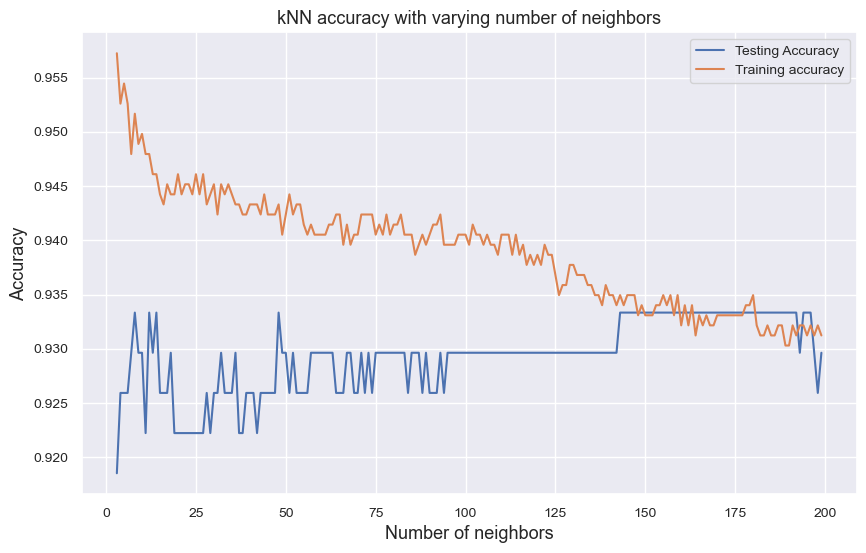

In [292]:
plt.figure(figsize = (10, 6))
plt.title('kNN accuracy with varying number of neighbors', fontsize = 13)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop={'size': 10})
plt.xlabel('Number of neighbors', fontsize = 13)
plt.ylabel('Accuracy', fontsize = 13)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

## Conclusion<a id="Conclusion"></a>

    One way to compare these approaches could be to create a table or chart showing the accuracy of each method on the classification task. You could also plot the results using a bar graph or line chart to visualize the comparison more easily. Additionally, you could calculate other evaluation metrics such as precision, recall, and F1 score to get a more comprehensive understanding of the performance of each method. It may also be helpful to consider the computational efficiency and time required for each method, as well as any other practical considerations such as the complexity of the model or the amount of data required for training.

In [409]:
# labels for all confusion matrices
cm_labels = ['Normal (0)', 'Abnormal (1)']

### LinearSVC

In [410]:
print(metrics.classification_report(y_test, y_predicted_lin_clf, digits=4))

              precision    recall  f1-score   support

           0     0.9254    0.9323    0.9288       133
           1     0.9338    0.9270    0.9304       137

    accuracy                         0.9296       270
   macro avg     0.9296    0.9297    0.9296       270
weighted avg     0.9297    0.9296    0.9296       270



<AxesSubplot:>

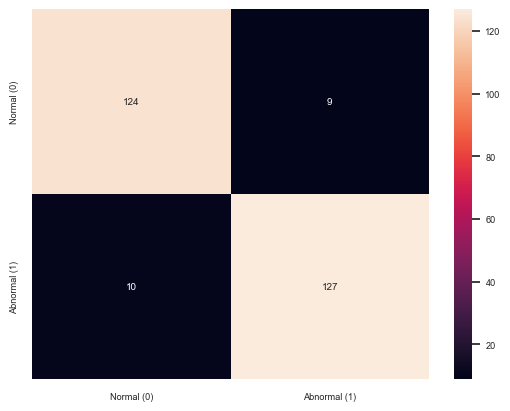

In [411]:
cm = confusion_matrix(y_test, y_predicted_lin_clf)
cm_dataframe = pd.DataFrame(cm, index=cm_labels, columns=cm_labels)
sns.heatmap(cm_dataframe, annot=True, fmt='d')

In [412]:
# CROSS VALIDATION
scores = cross_val_score(lin_clf, X_train_pca, y_train_rus, cv=10)
print(f"Mean score: {np.mean(scores):.3f}")
print(f"Standard deviation: {np.std(scores):.3f}")

Mean score: 0.949
Standard deviation: 0.018


### Neural Networks

In [413]:
y_pred_ann = ann_model.predict(X_test_pca)
y_pred_ann = y_pred_ann.flatten()
y_pred_ann_binary = np.where(y_pred_ann.round(2) > 0.5, 1, 0)

print(metrics.classification_report(y_test, y_pred_ann_binary, digits=4))

9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0     0.9323    0.9323    0.9323       133
           1     0.9343    0.9343    0.9343       137

    accuracy                         0.9333       270
   macro avg     0.9333    0.9333    0.9333       270
weighted avg     0.9333    0.9333    0.9333       270



<AxesSubplot:>

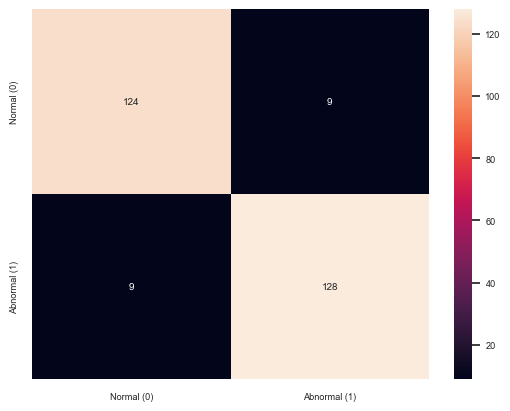

In [414]:
cm = confusion_matrix(y_test, y_pred_ann_binary)
cm_dataframe = pd.DataFrame(cm, index=cm_labels, columns=cm_labels)
sns.heatmap(cm_dataframe, annot=True, fmt='d')

In [415]:
# mean score for 10 folds of cross-validation for the best parameters.
score = grid_search_ann.cv_results_['mean_test_score'][grid_search_ann.best_index_]
stdev = grid_search_ann.cv_results_['std_test_score'][grid_search_ann.best_index_]

print(f"Mean score: {score:.3f}")
print(f"Standard deviation: {stdev:.3f}")

Mean score: 0.926
Standard deviation: 0.030


### k-Neighbours Classifier

In [416]:
print(metrics.classification_report(y_test, y_predicted_knn, digits=4))

              precision    recall  f1-score   support

           0     0.9248    0.9248    0.9248       133
           1     0.9270    0.9270    0.9270       137

    accuracy                         0.9259       270
   macro avg     0.9259    0.9259    0.9259       270
weighted avg     0.9259    0.9259    0.9259       270



<AxesSubplot:>

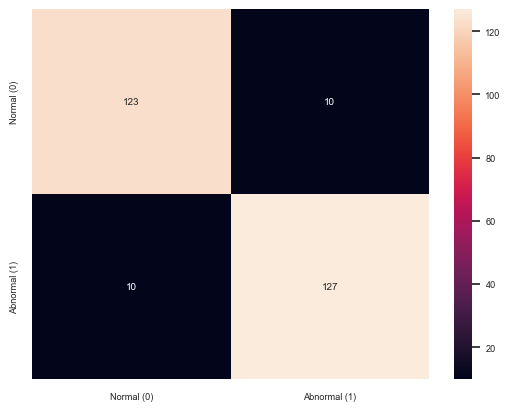

In [417]:
cm = confusion_matrix(y_test, y_predicted_knn)
cm_dataframe = pd.DataFrame(cm, index=cm_labels, columns=cm_labels)
sns.heatmap(cm_dataframe, annot=True, fmt='d')

In [418]:
# CROSS VALIDATION
scores = cross_val_score(kNN, X_train_pca, y_train_rus, cv=10)
print(f"Mean score: {np.mean(scores):.3f}")
print(f"Standard deviation: {np.std(scores):.3f}")

Mean score: 0.940
Standard deviation: 0.024
